# ASSIGNMENT 2
## Submission Deadline: 03/11/21, 2100 Hrs
## Submission Link: [https://forms.gle/wnUyJjhhbcFKdTGX8](https://forms.gle/wnUyJjhhbcFKdTGX8)

Name: Suman Singha

Roll No.: 180793

IITK EMail: ssingha@iitk.ac.in

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), an image folder, and Env folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Env folder is the environment implementation provided by us (DO NOT change it) and image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via following Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# Random Maze Environment

<b><center>Maze Environment</center></b> | <b><center>Maze Environment Transitions</center></b>
--- | ---
<img src="image/maze_env.png" style="height:300px"> | <img src="image/maze_env_transitions.png" style="height:300px">

In this assignment we will be exploring a variant of the Random Maze Environment (RME) that we have been looking in the lectures. The environment is represented as a grid world in Figure 1a. Random maze environment is a highly stochastic environment with 11 states: two terminal states (a goal state (G) and a hole state (H)) and 9 non-terminal states and a wall in between the environment. The wall behaves similar to the wall on the periphery of the environment, basically if an agent bumps against the wall, it bounces back. The boundary of the environment behaves similarly, if an agent hits the boundary it bounces back. The agent receives a reward of +1 when it lands in the goal state (3) and it receives a reward of -1 when it lands in the hole state (7). For rest of the transitions there is a reward of -0.04. Essentially the agent has the living cost of -0.04. The transitions are stochastic as shown in Figure 1b. In this environment, four actions are possible: left, top, right, and bottom. For every intended action, there is 80% chance of going in the intended direction and remaining 20% chances of going in either of the orthogonal directions. The 20% chance gets equally distributed between each of the orthogonal direction. The agent starts from state 8 (S). Assume γ = 0.99 for the problems below.

In this assignment we will be looking at control algorithms we learnt in Lecture 10 and 11. For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot. For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. As you are aware from your past experience, single run of the algorithm over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy.

In [1]:
# Environment setup
!pip install --editable Environments

Obtaining file:///D:/New%20folder%20%286%29/7th_sem/CS698R/assignment_2_modified/assignment_2/Environments
  Attempting uninstall: environments
    Found existing installation: environments 1.0.0
    Uninstalling environments-1.0.0:
      Successfully uninstalled environments-1.0.0
  Running setup.py develop for environments


You should consider upgrading via the 'c:\users\suman\appdata\local\programs\pythoncodingpack\python.exe -m pip install --upgrade pip' command.


### <span style="color:red">Restart the kernel.</span>

In [2]:
# all imports go in here
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Create environment
env = gym.make('environments:random_maze-v0')

The environment can be interacted with via standard functions, reset() and step(). The environment uses the following structure.

#### States: 
        0        1        2         3(Goal)
        4        5(Wall)  6         7(Hole)
        8(Start) 9        10        11
#### Action space:
        0 -> LEFT
        1 -> UP
        2 -> RIGHT
        3 -> DOWN
#### Rewards:
        If Goal state: +1
        If Hole state: -1
        Otherwise: -0.04
#### Step() returns:
        state,       reward,            is_Terminal                               info
        Next state   Reward received    Whether next state is a terminal state    Info dictionary (Empty)

### All your hyperparameters should be defined here. We will change their value here and your code should work  accordingly.

In [19]:
# mention the values of all the hyperparameters to be used in the entire notebook

gamma = 0.99
alpha = 1
epsilon = 1
maxSteps = 100
noEpisodes = 20000
noEpisodes1 = 1500
noEpisodes2 = 3000
lda = 0.9
noPlanning = 10
maxTrajectory = 10

In [5]:
# function to plot graph for given state-value and Q-value function vs Epsisodes
def plot(state_value, q_value):
    true_val = np.array([0.8244, 0.8929, 0.9546, 0, 0.7643, 0, 0.6882, 0, 0.6976, 0.6391, 0.6061, 0.3819])
    plt.figure(figsize=(14, 7))
    for i in range(12):
        if i == 5 or i == 3 or i == 7: continue
        plt.plot(state_value[:, i], label = 'State Value for State ' + str(i))
        plt.axhline(y = true_val[i], linestyle='--', label = "V(" + str(i) + ")")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.axhline(y = true_val[2], linestyle='--', label = "V(2)")
    for i in range(4):
        plt.plot(q_value[:, 2, i], label = 'State 2, Action: ' + str(i))
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.axhline(y = true_val[6], linestyle='--', label = "V(6)")
    for i in range(4):
        plt.plot(q_value[:, 6, i], label = 'State 6, Action: ' + str(i))
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.axhline(y = true_val[8], linestyle='--', label = "V(8)")
    for i in range(4):
        plt.plot(q_value[:, 8, i], label = 'State 8, Action: ' + str(i))
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.axhline(y = true_val[11], linestyle='--', label = "V(11)")
    for i in range(4):
        plt.plot(q_value[:, 11, i], label = 'State 11, Action: ' + str(i))
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()
    # your code goes here.

## Problem 1: Monte Carlo Control
(40+20+20+5+5+5+5=100 points)

Implement the Monte Carlo Control for the Random Maze Environment (RME) described above. In particular, you need to implement First Visit Monte Carlo Control (FMVCC) for finding the optimal policy for RME. Use the function definition (given below) as given in Lecture 10, slide 19.

`MonteCarloControl(env, γ, α0, ϵ0, maxSteps, noEpisodes, firstVisit = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [6]:
def decayLearningRate(e):
    return 1/(1+e)

def decayEpsilon(epsilon, e):
    initialvalue = 1
    finalvalue = 0.001
    noEpisodes = 500
    decayType = "exponential"
    if decayType == "linear":
        decay = (finalvalue - initialvalue) / (noEpisodes - 1)
        epsilon = max(epsilon + decay, 0.01)
    elif decayType == "exponential":
        decay = ((finalvalue / initialvalue) ** (1/(noEpisodes - 1)))
        epsilon = max(epsilon*decay, 0.01)
    return epsilon

def generateTrajectory(env, q, epsilon, maxSteps):
    env.reset()
    t = np.empty((0,4))
    s = 8
    for e in range(maxSteps):
        if np.random.uniform(0, 1) > epsilon:
            a = np.argmax(q[s, :])
        else:
            a = np.random.randint(0, 4)
        new_s, r, f, _ = env.step(a)
        if e == 0:
            exp_tuple = np.array([np.array([8, a, r, new_s])])
        else:
            exp_tuple = np.array([np.array([t[e-1][3], a, r, new_s])])
        t = np.append(t, exp_tuple, axis = 0)
        s = new_s
        if f:
            break
    if f:
        return t
    else:
        return np.empty((0,4))

In [7]:
# First Visit Monte Carlo Control (FMVCC)
def monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes, firstVisit = True):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)
        t = generateTrajectory(env, q, epsilon, maxSteps)
        vis = np.zeros((12, 4), dtype=bool)
        for i, (s, a, r, sprime) in enumerate(t):
            if vis[int(s), int(a)] and firstVisit: continue
            vis[int(s), int(a)] = True
            G = 0
            for j in range(i, len(t)):
                G += t[j, 2] * gamma ** (j-i)   
            q[int(s), int(a)] += alpha * (G - q[int(s), int(a)])
        q_value[e] = q
    state_value = np.max(q_value, axis = 2)
    optimal_policy = np.argmax(q, axis = 1)
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy


100%|██████████| 10/10 [01:20<00:00,  8.09s/it]


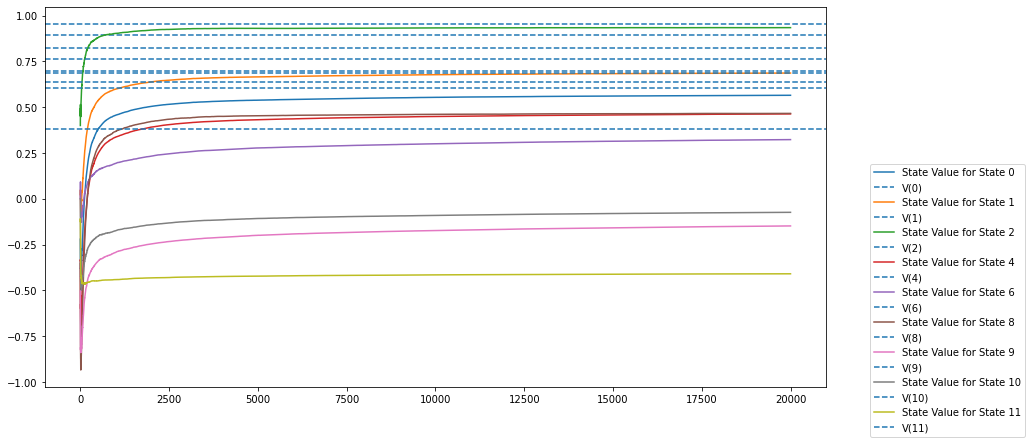

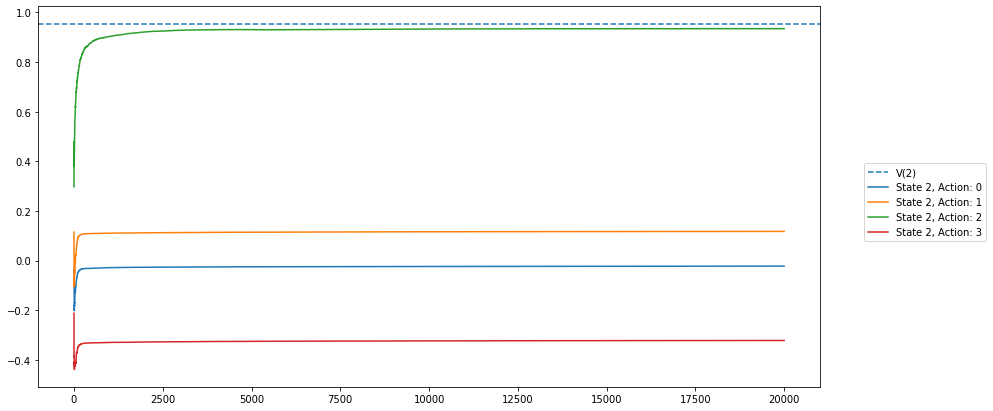

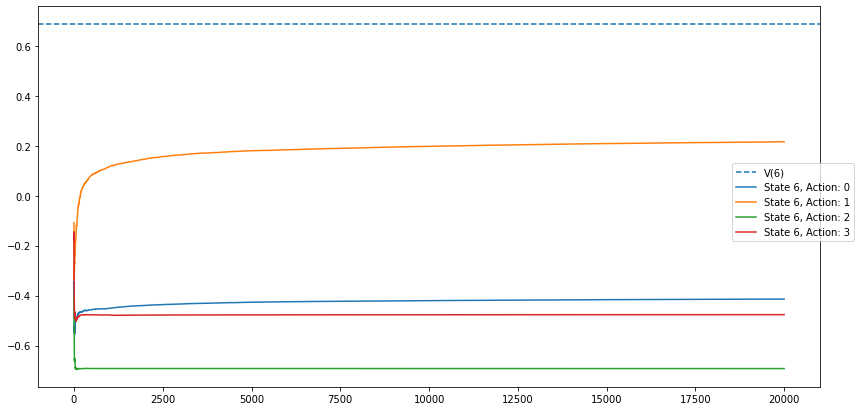

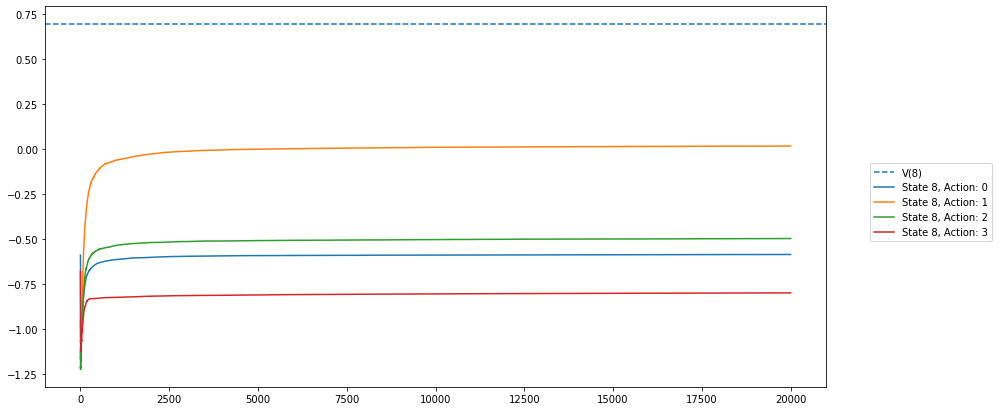

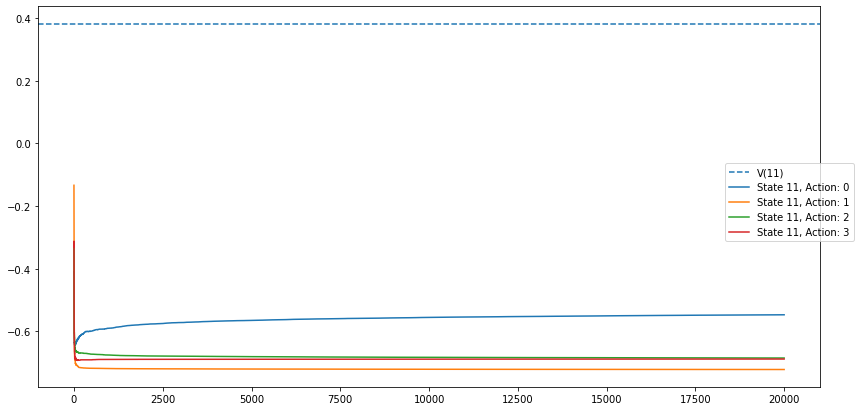

[2 2 2 0 1 0 0 0 1 2 1 2]


In [8]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000 + i)
    state_value[i], q_value[i], optimal_policy = monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes, firstVisit = True)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal policy</b> 

<img src="image/opt1.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/(e+1)), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> Monte Carlo is not giving accurate results with this environment. This process depends on sampling trajactory. So, V-function converges to true value only when a lot of sample is considered and every possible trajactory is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoretically, if we run this algorithm for infinite amount of time, all posiible trajactory will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~5K) initial episodes. 

## Problem 2: SARSA (TD Control)
(40+20+20+5+5+5+5=100 points)

Implement the SARSA algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 22.

`SARSA(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [9]:
def actionSelect(s, q, epsilon):
    if np.random.uniform(0, 1) > epsilon:
        a = np.argmax(q[s, :])
    else:
        a = np.random.randint(0, 4)
    return a

In [10]:
# SARSA
def sarsa(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)  
        s, done = env.reset()
        a = actionSelect(s, q, epsilon)
        while not done:
            sprime, r, done, _ = env.step(a)
            aprime = actionSelect(sprime, q, epsilon)
            td_target = r
            if not done:
                td_target += gamma*q[sprime, aprime]
            td_error = td_target - q[s, a]
            q[s, a] += alpha*td_error
            s, a = sprime, aprime
        q_value[e] = q
    state_value = np.max(q_value, axis=2)
    optimal_policy = np.argmax(q, axis = 1)
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:40<00:00,  4.09s/it]


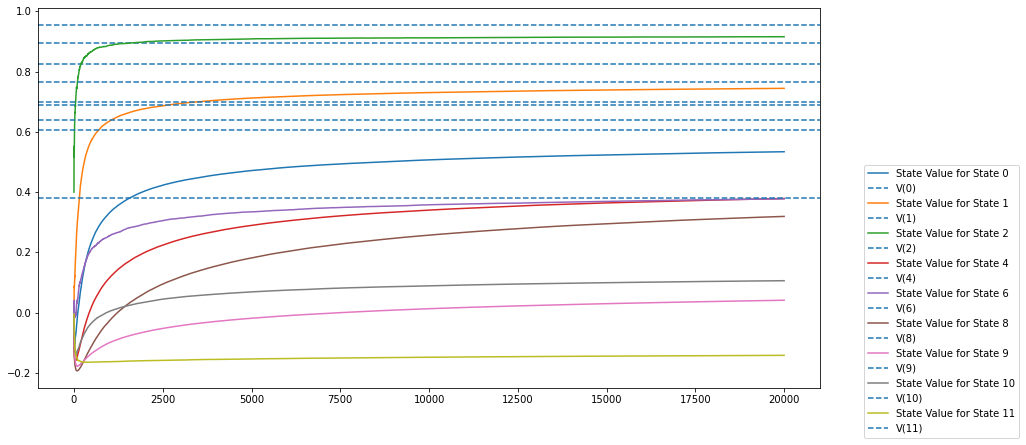

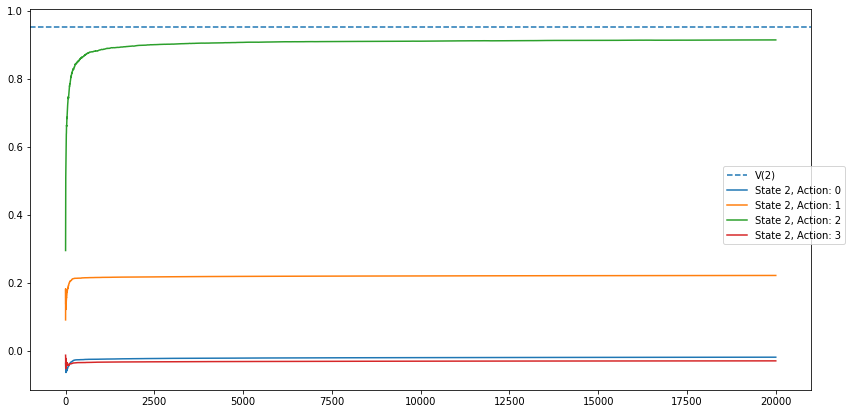

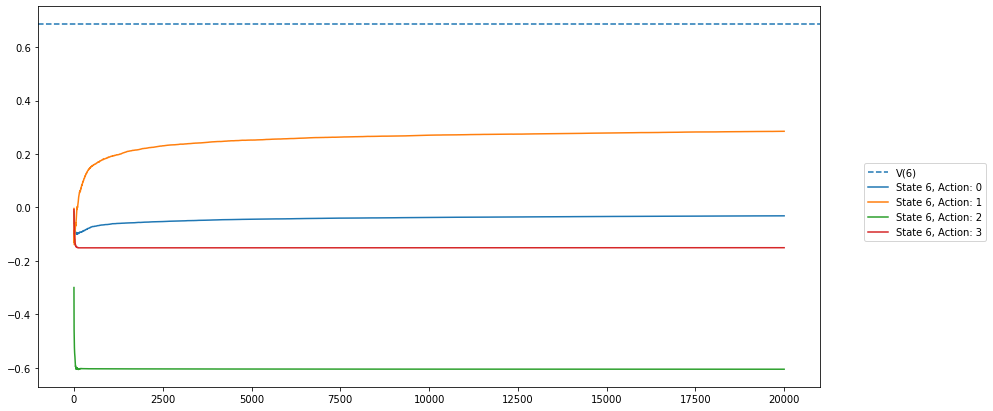

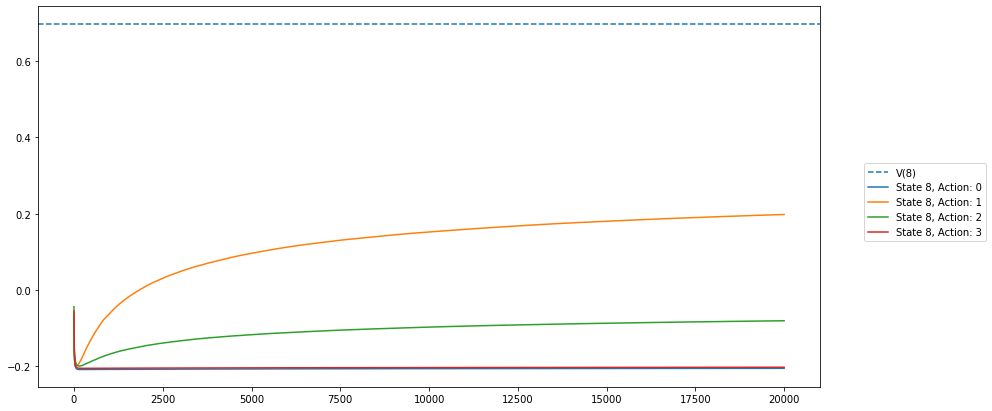

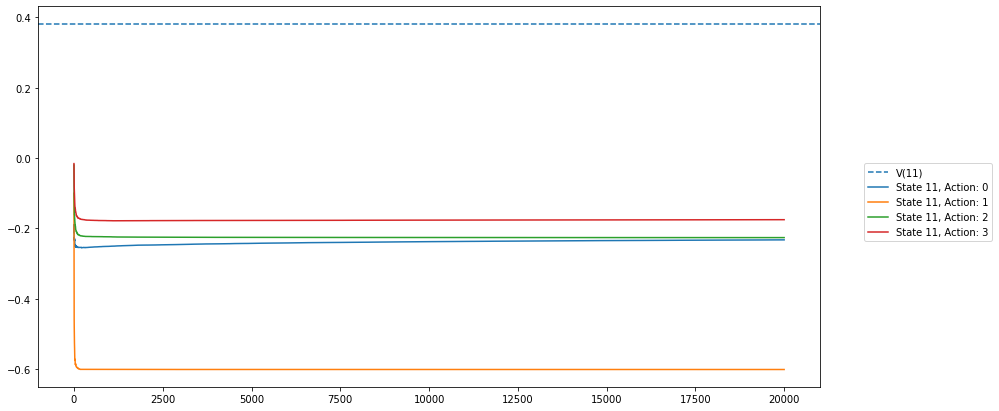

[2 2 2 0 1 0 1 0 2 2 1 0]


In [11]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = sarsa(env, gamma, alpha, epsilon, noEpisodes)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt2.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/(e+1)), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> Sarsa is not giving very accurate results with this environment. This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoretically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~8K) initial episodes. 

--> This process converges faster than monte carlo because this algorithm doesn't wait for the whole trajectory, rather updates q-function in every step. 

## Problem 3: Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 25.

`Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [12]:
# Q-Learning
def q_learning(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)  
        s, done = env.reset()
        while not done:
            a = actionSelect(s, q, epsilon)
            sprime, r, done, _ = env.step(a)
            td_target = r
            if not done:
                td_target += gamma*np.max(q[sprime, :])
            td_error = td_target - q[s, a]
            q[s, a] += alpha*td_error
            s = sprime
        q_value[e] = q
    state_value = np.max(q_value, axis=2)
    optimal_policy = np.argmax(q, axis = 1)    
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:46<00:00,  4.61s/it]


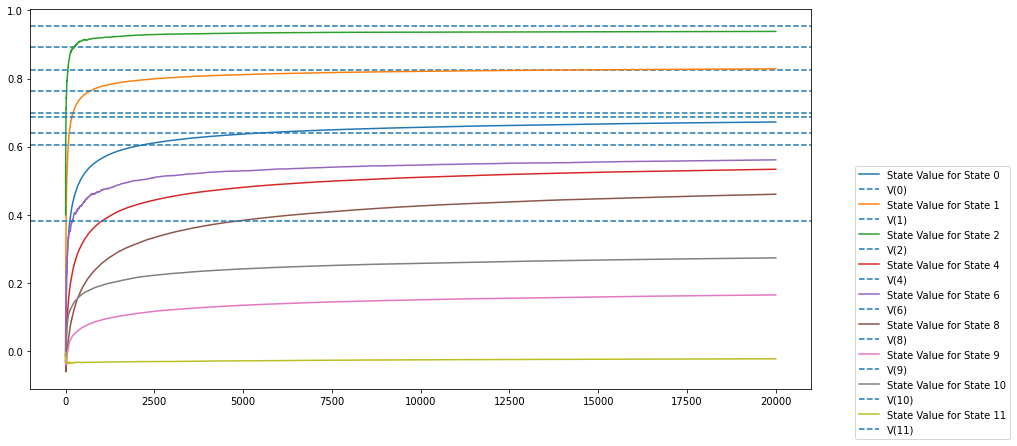

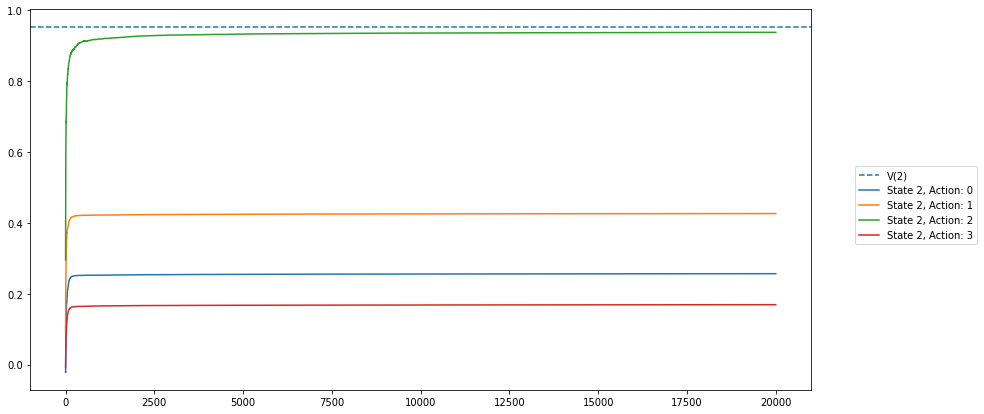

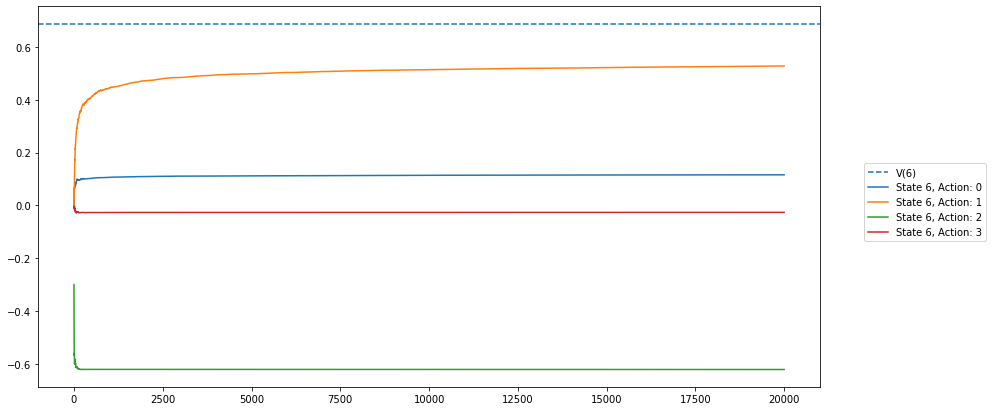

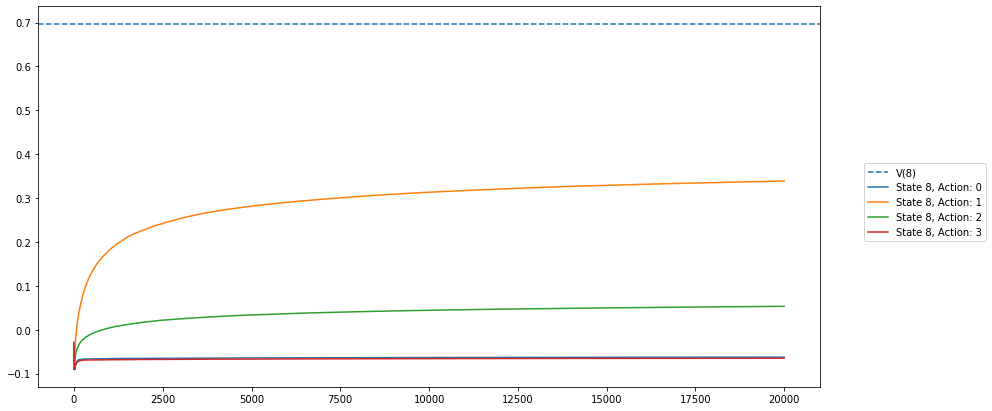

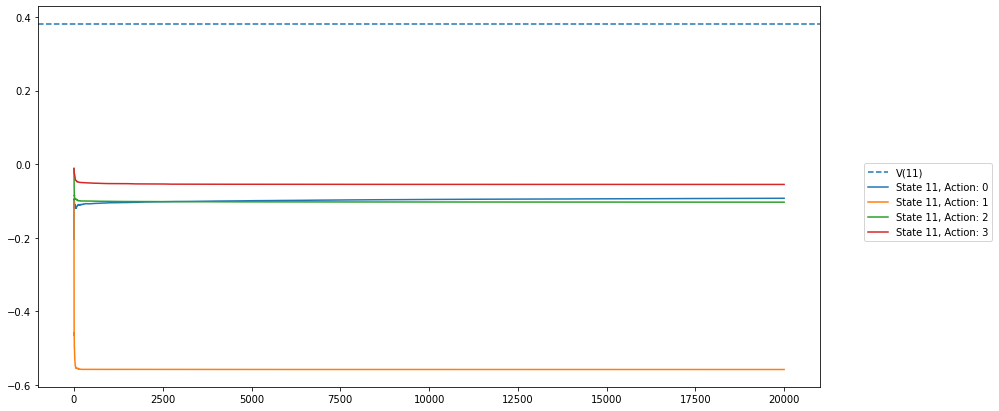

[2 2 2 0 1 0 1 0 2 2 1 0]


In [21]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = q_learning(env, gamma, alpha, epsilon, noEpisodes)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt2.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/(e+1)), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> Q-learning is not giving very much accurate results with this environment. This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoretically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~10K) initial episodes. 

--> Convergence is faster than monte carlo control and sarsa.

## Problem 4: Double Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Double Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slides 27, 28.

`Double-Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [14]:
# Double Q-Learning
def double_q_learning(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    q1 = np.zeros((12, 4))
    q_value1 = np.zeros((noEpisodes, 12, 4))
    q2 = np.zeros((12, 4))
    q_value2 = np.zeros((noEpisodes, 12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)
        s, done = env.reset()
        while not done:
            a = actionSelect(s, q, epsilon)
            sprime, r, done, _ = env.step(a)
            if np.random.randint(2):
                aq1 = np.argmax(q1[sprime, :]) 
                td_target = r
                if not done:
                    td_target += gamma*q2[sprime, aq1]
                td_error = td_target - q1[s, a]
                q1[s, a] += alpha*td_error
            else:
                aq2 = np.argmax(q2[sprime, :]) 
                td_target = r
                if not done:
                    td_target += gamma*q1[sprime, aq2]
                td_error = td_target - q2[s, a]
                q2[s, a] += alpha*td_error
            s = sprime
        q_value1[e] = q1
        q_value2[e] = q2
        q = (q1 + q2)/2
        q_value[e] = q
    state_value = np.max(q_value, axis = 2)
    optimal_policy = np.argmax(q, axis = 1) 
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:51<00:00,  5.15s/it]


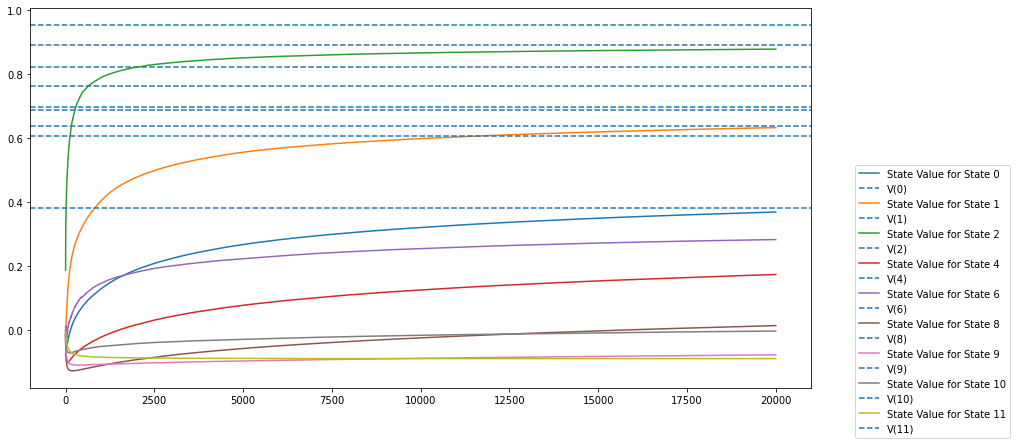

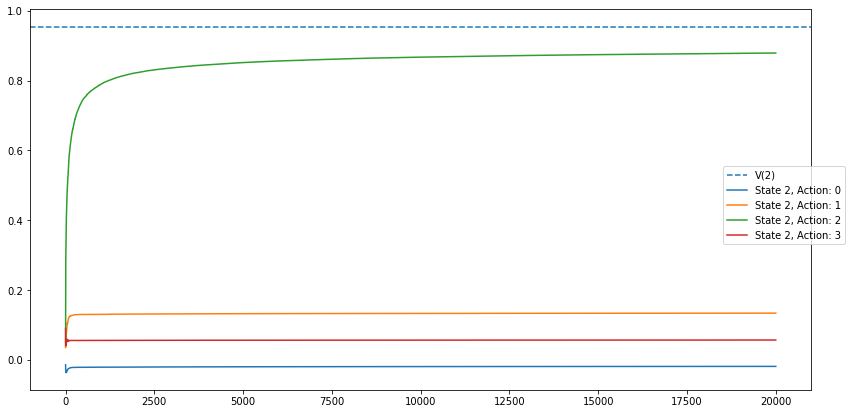

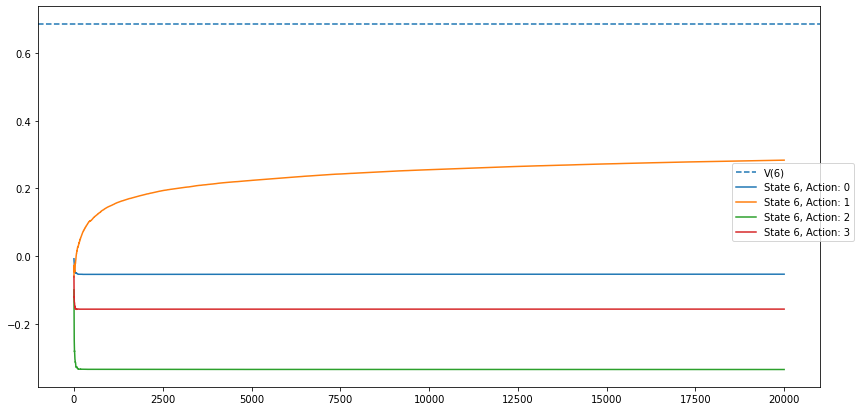

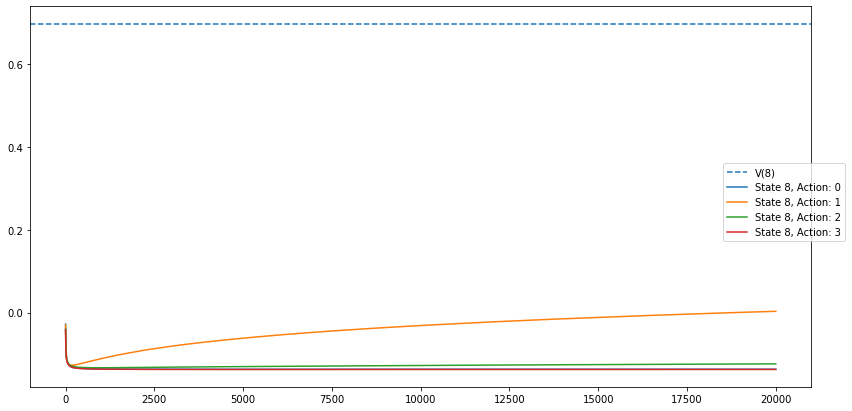

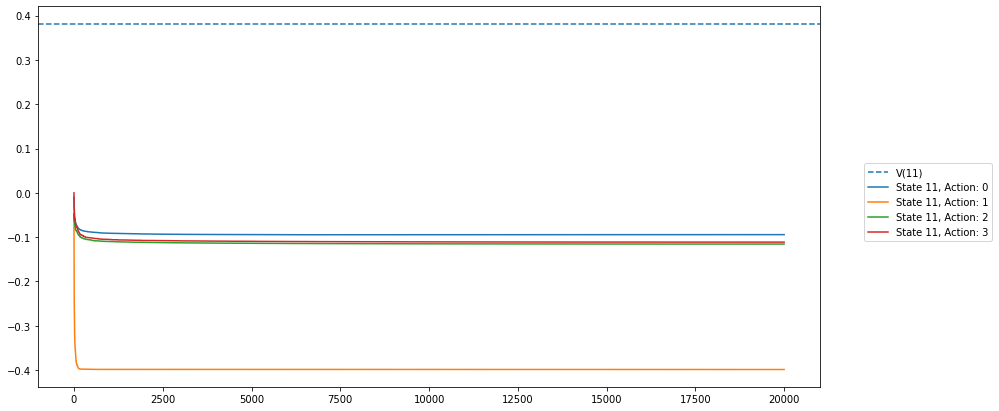

[2 2 2 0 1 0 1 0 2 2 1 0]


In [15]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = double_q_learning(env, gamma, alpha, epsilon, noEpisodes)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt2.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/(e+1)), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> Double Q learning is not giving very accurate results with this environment. This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoretically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~10K) initial episodes. 

--> Convergence is faster than monte carlo control and sarsa. 

--> We can see that it's more stable (less variance) than Q-learning, but convergence is slower than Q-learning.

## Problem 5: Comparing Control Algorithms
(20+5+5+5+5+5=40 points)

For FVMCC, SARSA, Q and Double-Q algorithms implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes. Policy Success Rate is de

ned as number of times the agent reaches the goal state out of the total number of the episodes run using a specific policy. Basically implement the following function that would return the policy success percentage. As you are training the agent, at each episode, you will have a version of the policy, use that  policy along with the function below to get the policy success rate.

    `def getPolicySuccessRate(env, π_current, goalState, maxEpisodes = 100, maxSteps = 200)`
    
    
    
(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

In [22]:
# run episodes with the policy passed as an argument and compute success rate
def get_policy_success_rate(env, current_policy, goal_state, maxEpisodes = 100, maxSteps = 200):
    # your code goes here
    count = 0
    G = 0
    for e in range(maxEpisodes):
        s, done = env.reset()
        for i in range(maxSteps):
            a = current_policy[s]
            sprime, r, done, _ = env.step(a)
            G += (gamma**i)*r
            if sprime == goal_state:
                count += 1
                break
            s = sprime
    policy_success_rate = (count/maxEpisodes)*100
    exp_return = G/maxEpisodes
    return policy_success_rate, exp_return  

100%|██████████| 3000/3000 [07:20<00:00,  6.82it/s]


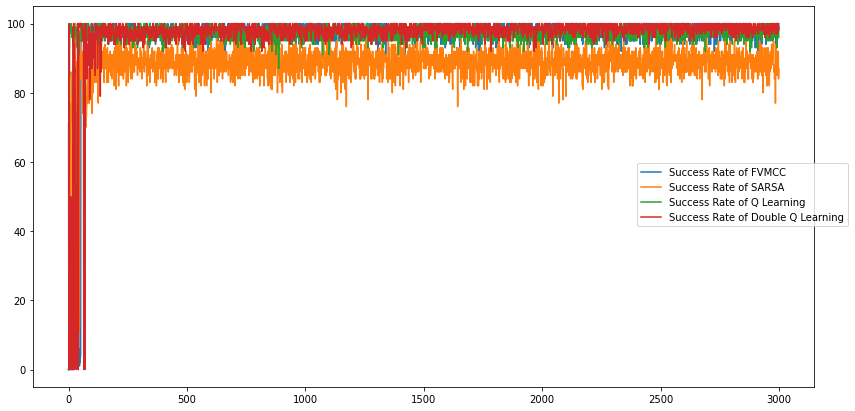

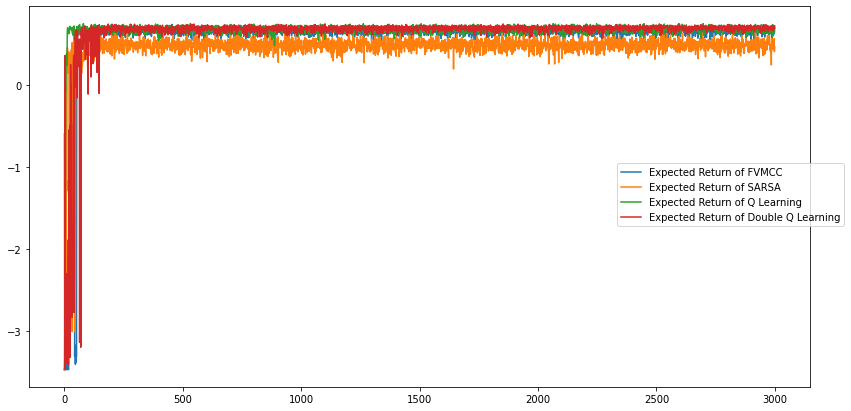

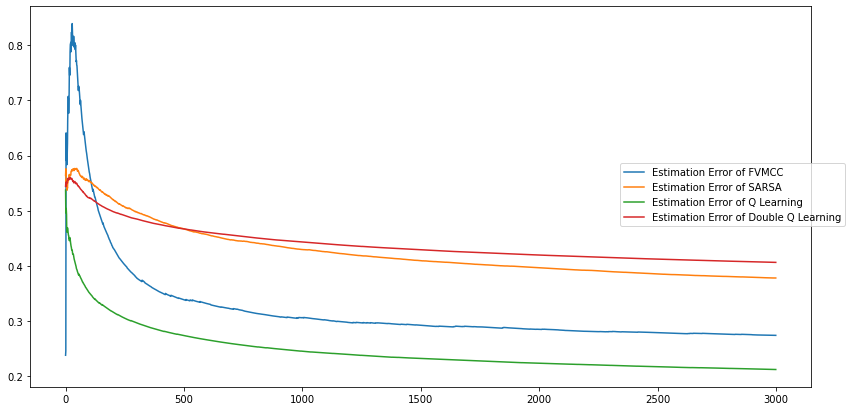

In [23]:
#your code goes here
true_val = np.array([0.8244, 0.8929, 0.9546, 0, 0.7643, 0, 0.6882, 0, 0.6976, 0.6391, 0.6061, 0.3819])

state_mc, temp1, _ = monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes2, firstVisit = True)
state_sarsa, temp2, _ = sarsa(env, gamma, alpha, epsilon, noEpisodes2)
state_q, temp3, _ = q_learning(env, gamma, alpha, epsilon, noEpisodes2)
state_dq, temp4, _ = double_q_learning(env, gamma, alpha, epsilon, noEpisodes2)

fvmcc = np.argmax(temp1, axis = 2)
sarsapolicy = np.argmax(temp2, axis = 2)
qlearning = np.argmax(temp3, axis = 2)
doubleq = np.argmax(temp4, axis = 2)

success_rate_fvmcc = np.zeros(noEpisodes2)
success_rate_sarsa = np.zeros(noEpisodes2)
success_rate_qlearning = np.zeros(noEpisodes2)
success_rate_doubleq = np.zeros(noEpisodes2)

exp_fvmcc = np.zeros(noEpisodes2)
exp_sarsa = np.zeros(noEpisodes2)
exp_qlearning = np.zeros(noEpisodes2)
exp_doubleq = np.zeros(noEpisodes2)

for e in tqdm(range(noEpisodes2)):
    success_rate_fvmcc[e], exp_fvmcc[e] = get_policy_success_rate(env, fvmcc[e, :], 3)
    success_rate_sarsa[e], exp_sarsa[e] = get_policy_success_rate(env, sarsapolicy[e, :], 3)
    success_rate_qlearning[e], exp_qlearning[e] = get_policy_success_rate(env, qlearning[e, :], 3)
    success_rate_doubleq[e], exp_doubleq[e] = get_policy_success_rate(env, doubleq[e, :], 3)

estimation_error_mc = np.mean(np.abs(state_mc - true_val), axis = 1)
estimation_error_sarsa = np.mean(np.abs(state_sarsa - true_val), axis = 1)
estimation_error_q = np.mean(np.abs(state_q - true_val), axis = 1)
estimation_error_dq = np.mean(np.abs(state_dq - true_val), axis = 1)

plt.figure(figsize=(14, 7))
plt.plot(success_rate_fvmcc, label = 'Success Rate of FVMCC')
plt.plot(success_rate_sarsa, label = 'Success Rate of SARSA')
plt.plot(success_rate_qlearning, label = 'Success Rate of Q Learning')
plt.plot(success_rate_doubleq, label = 'Success Rate of Double Q Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(exp_fvmcc, label = 'Expected Return of FVMCC')
plt.plot(exp_sarsa, label = 'Expected Return of SARSA')
plt.plot(exp_qlearning, label = 'Expected Return of Q Learning')
plt.plot(exp_doubleq, label = 'Expected Return of Double Q Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(estimation_error_mc, label = 'Estimation Error of FVMCC')
plt.plot(estimation_error_sarsa, label = 'Estimation Error of SARSA')
plt.plot(estimation_error_q, label = 'Estimation Error of Q Learning')
plt.plot(estimation_error_dq, label = 'Estimation Error of Double Q Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

Observations:

(b)--> The hyperparameters are written in one above cell. All algorithm is run for 3000 episodes. From the percentage success rate graph we can see that FVMCC, Q-learning, Double Q learning is giving close to 100% success rate, but SARSA is stuck around 90%. Q-learning is converging in very less number of episodes, but double q-learning is taking much episodes.

(d)--> The expected return of state 8 (start state) is around 0.7 for Q-learning, FVMCC and double Q-learning which is same as the true value of the state. SARSA estimation quite poor in terms of expected return.

(f)--> The average estimation error in state value function is decreasing with number of episodes increasing. Also we can see that Q-learning is giving most accurate result while SARSA is giving least accurate result. Also, double q learning graph is less steep than others because it's more stable (variance is low).

## Problem 6: SARSA(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [24]:
# SARSA-lambda Replacing
def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    E = np.zeros((12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)  
        E = np.zeros((12, 4))
        s, done = env.reset()
        a = actionSelect(s, q, epsilon)
        while not done:
            sprime, r, done, _ = env.step(a)
            aprime = actionSelect(sprime, q, epsilon)
            td_target = r
            if not done:
                td_target += gamma*q[sprime, aprime]
            td_error = td_target - q[s, a]
            E[s, a] += 1
            if replaceTrace: 
                np.clip(E, 0, 1)
            q += alpha*td_error*E
            E *= gamma * lda
            s, a = sprime, aprime
        q_value[e] = q
    state_value = np.max(q_value, axis = 2)
    optimal_policy = np.argmax(q, axis = 1)    
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [01:15<00:00,  7.54s/it]


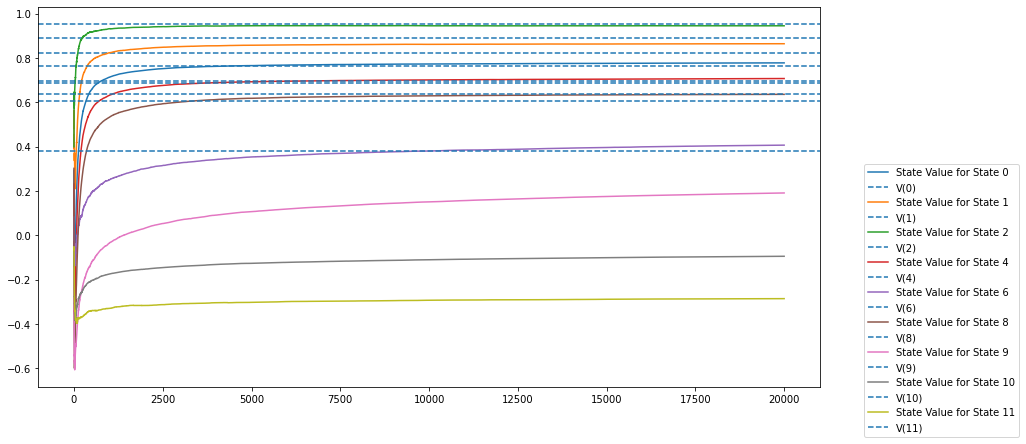

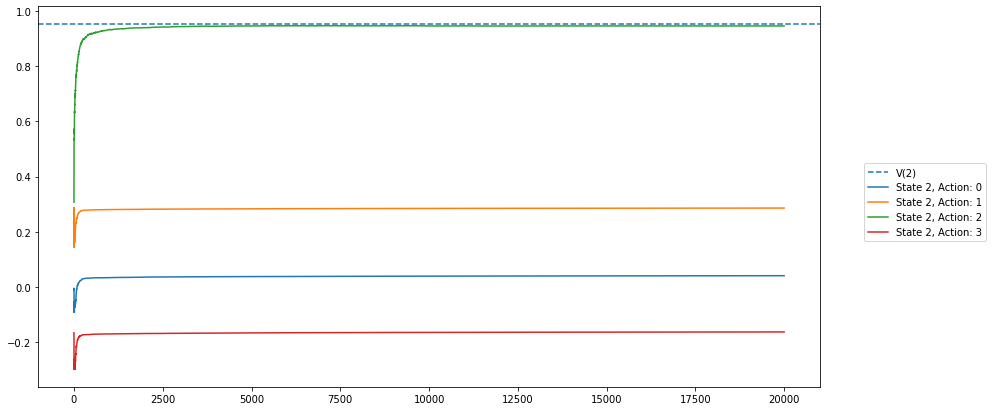

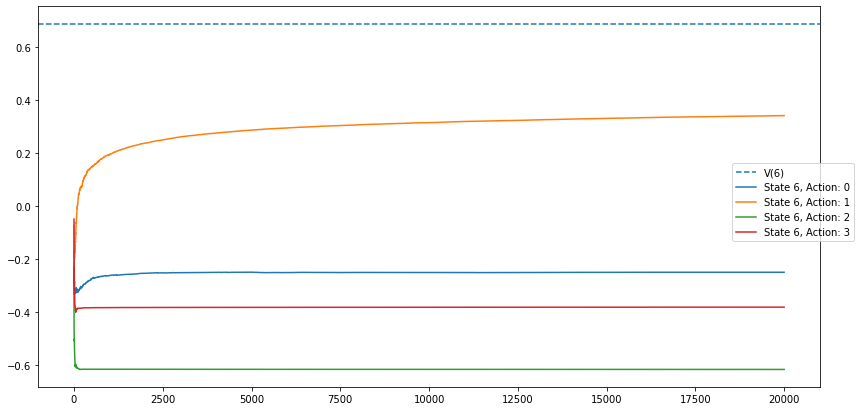

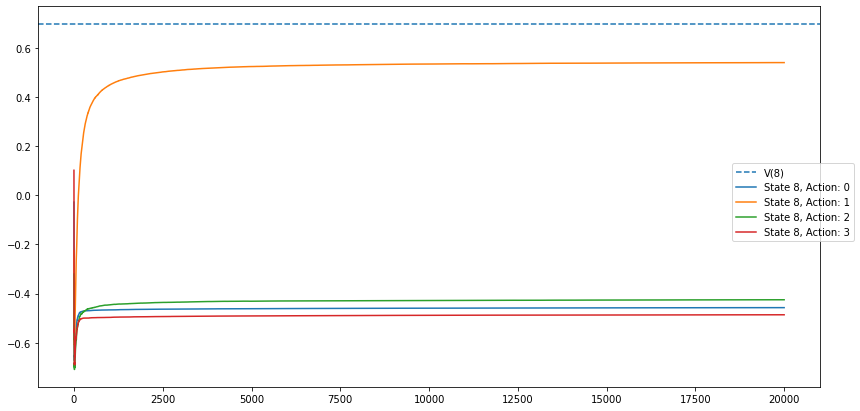

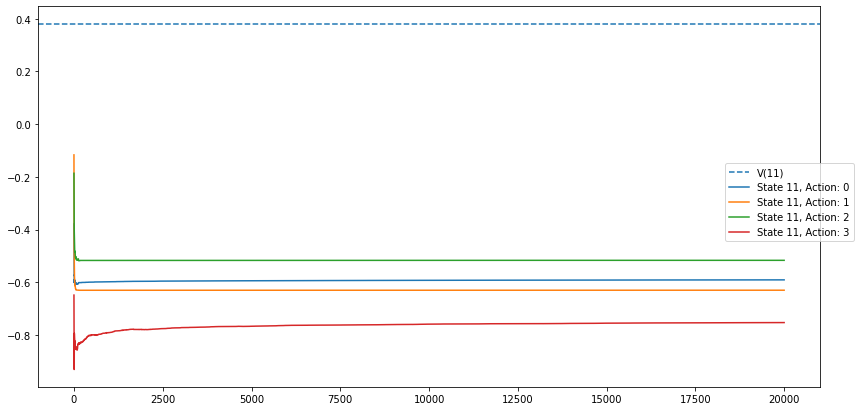

[2 2 2 0 1 0 1 0 1 2 1 3]


In [25]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt3.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/(e+1)), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoritically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~15K) initial episodes. 

--> If we give priority to those states which are visited more by using eligibility trace, it converges much faster. This is clear if we caompare this algorithm with SARSA.

## Problem 7: SARSA(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [ ]:
# SARSA-lambda Accumulating (Function same as replacetreace)
# def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    # return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:47<00:00,  4.73s/it]


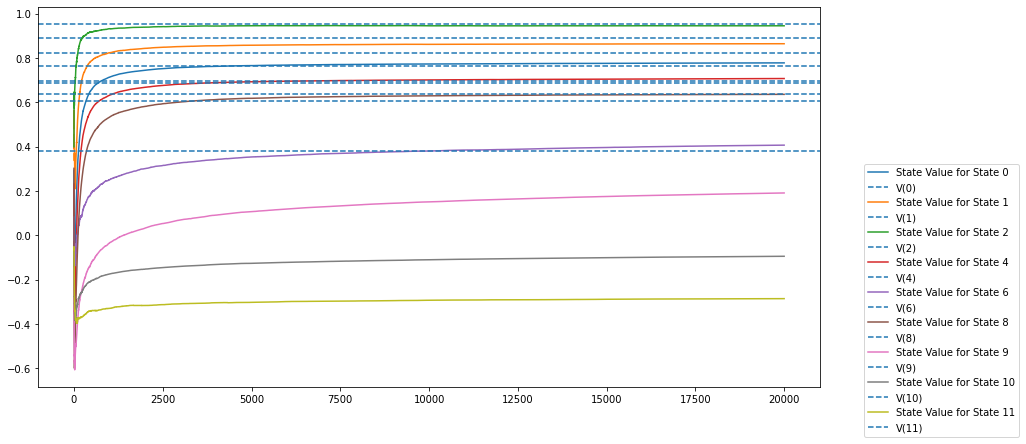

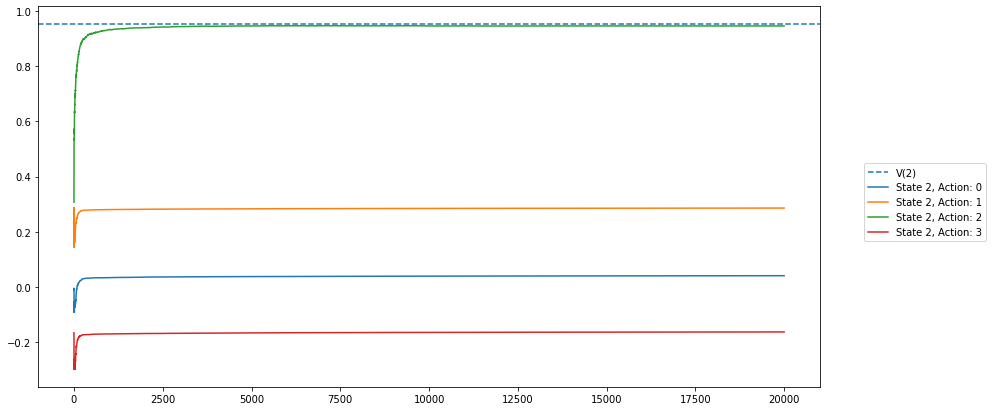

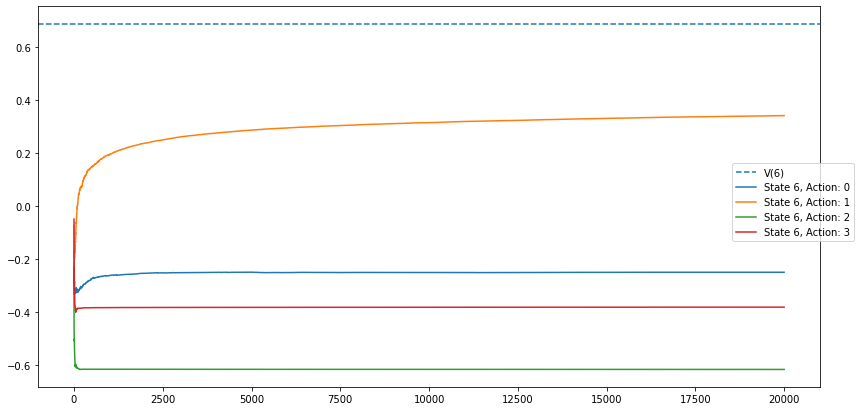

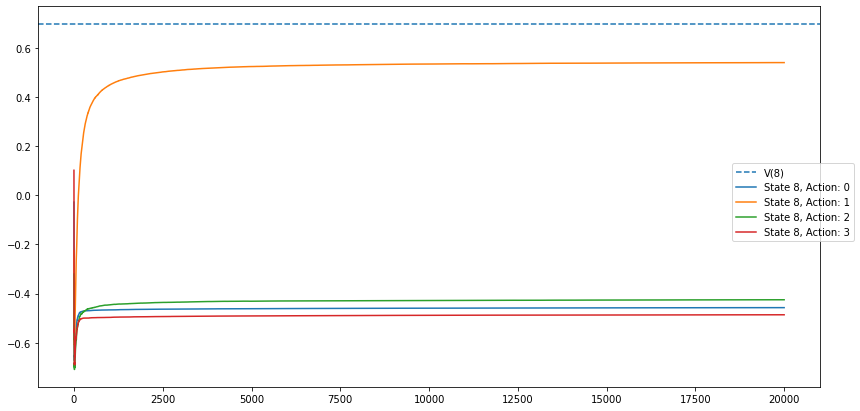

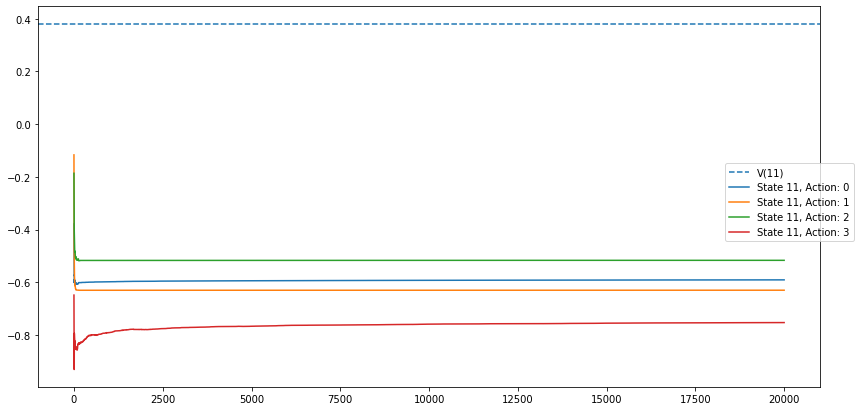

[2 2 2 0 1 0 1 0 1 2 1 3]


In [27]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt3.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/e+1), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoritically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~15K) initial episodes.

--> If we give priority to those states which are visited more by using eligibility trace, it converges much faster. This is clear if we caompare this algorithm with SARSA.

--> Performance is very similar to SARSA lambda replacing.

## Problem 8: Q(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [28]:
# Q-lambda Replacing
def q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    E = np.zeros((12, 4))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e) 
        E[:] = 0
        s, done = env.reset()
        a = actionSelect(s, q, epsilon)
        while not done:
            sprime, r, done, _ = env.step(a)
            aprime = actionSelect(sprime, q, epsilon)
            if q[sprime, aprime] == np.max(q[sprime, :]):
                sprimegreedy = True
            else:
                sprimegreedy = False
            td_target = r
            if not done:
                td_target += gamma*np.max(q[sprime, :])
            td_error = td_target - q[s, a]
            if replaceTrace:
                E[s, :] = 0
            E[s, a] += 1
            q += alpha*td_error*E
            if sprimegreedy:
                E *= gamma*lda
            else:
                E[:] = 0
            s, a = sprime, aprime
        q_value[e] = q
    state_value = np.max(q_value, axis=2)
    optimal_policy = np.argmax(q, axis = 1)     
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [01:03<00:00,  6.33s/it]


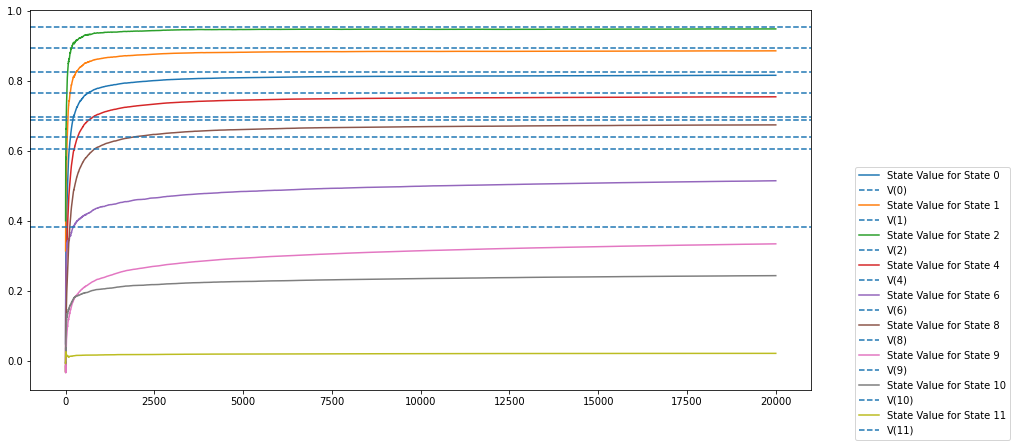

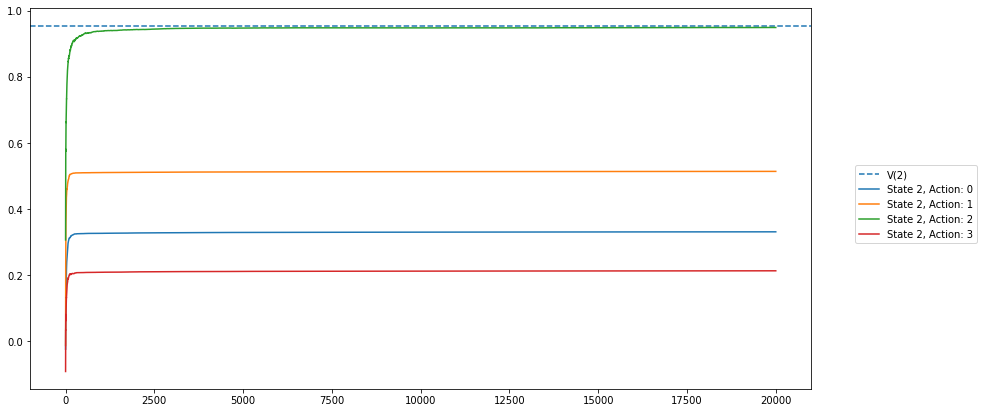

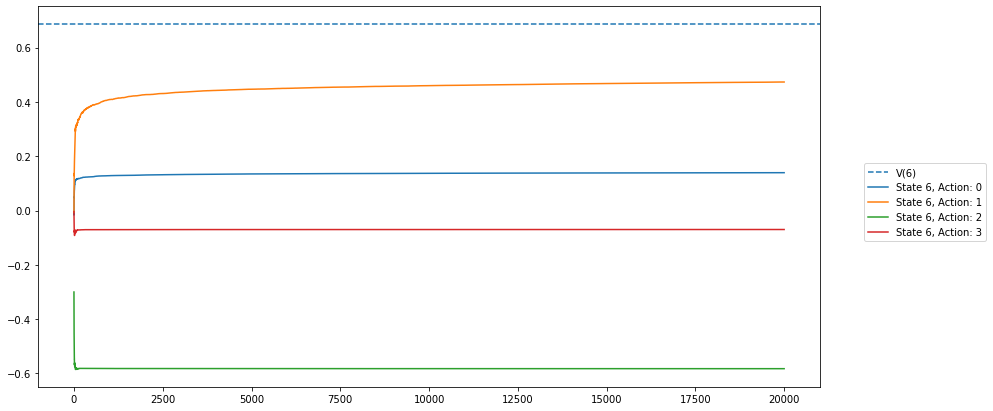

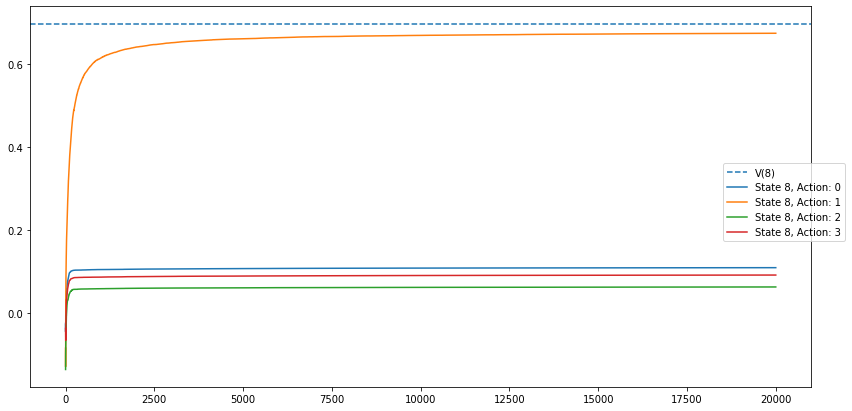

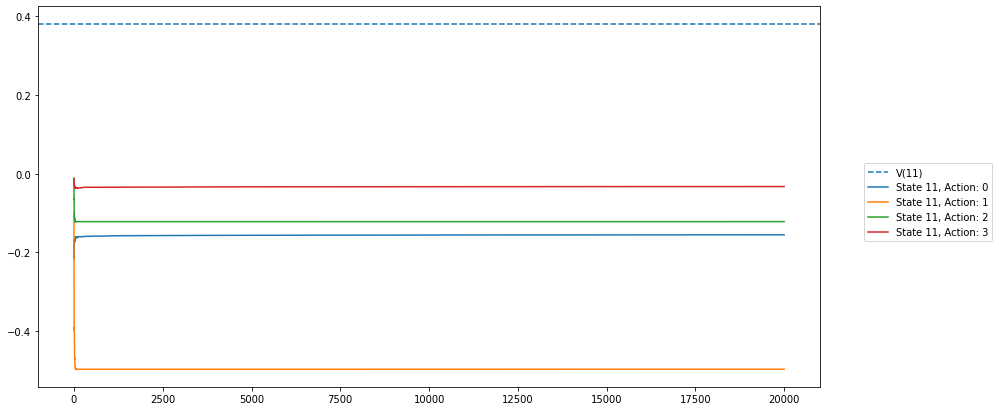

[2 2 2 0 1 0 1 0 1 2 1 0]


In [ ]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt6.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/e+1), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoritically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~15K) initial episodes. 

--> If we give priority to those states which are visited more by using eligibility trace, it converges much faster. This is clear if we caompare this algorithm with Q-learning.

--> Much better convergence than SARSA lambda.

## Problem 9: Q(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [ ]:
# Q-lambda Accumulating
# def q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    # return state_value, q_value, optimal_policy

100%|██████████| 10/10 [01:00<00:00,  6.06s/it]


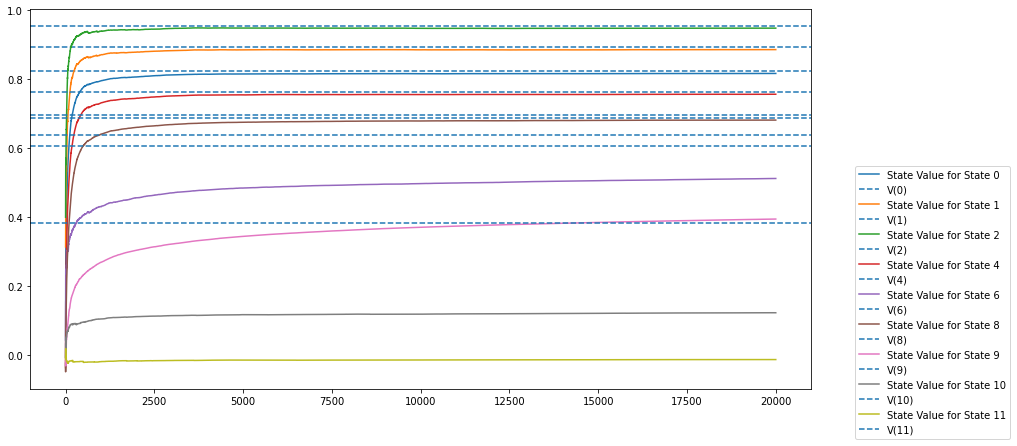

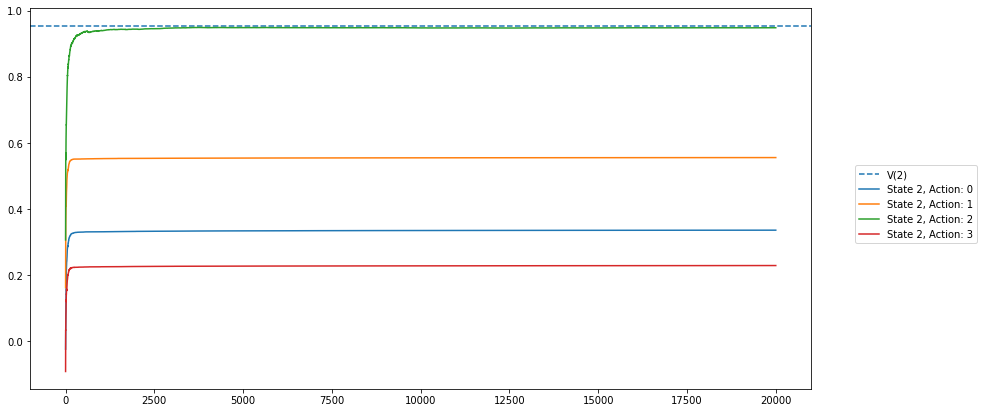

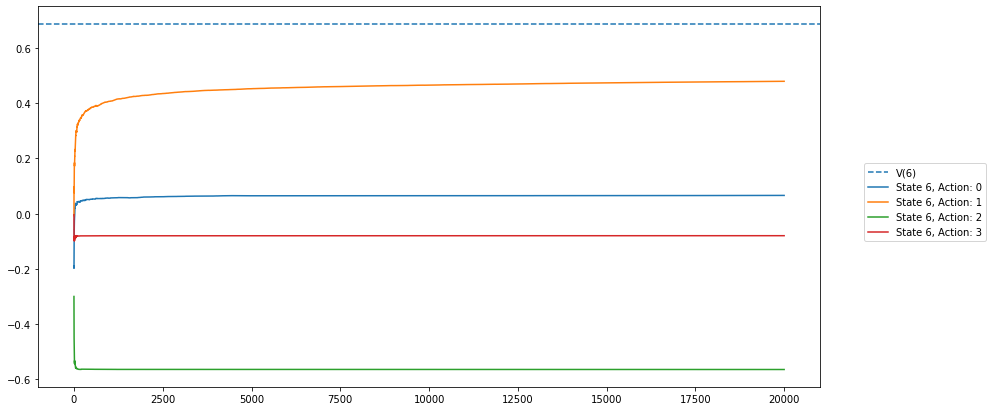

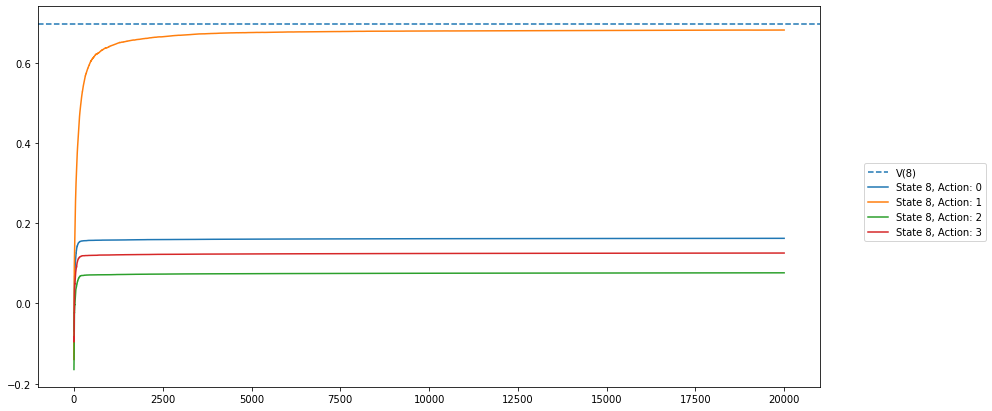

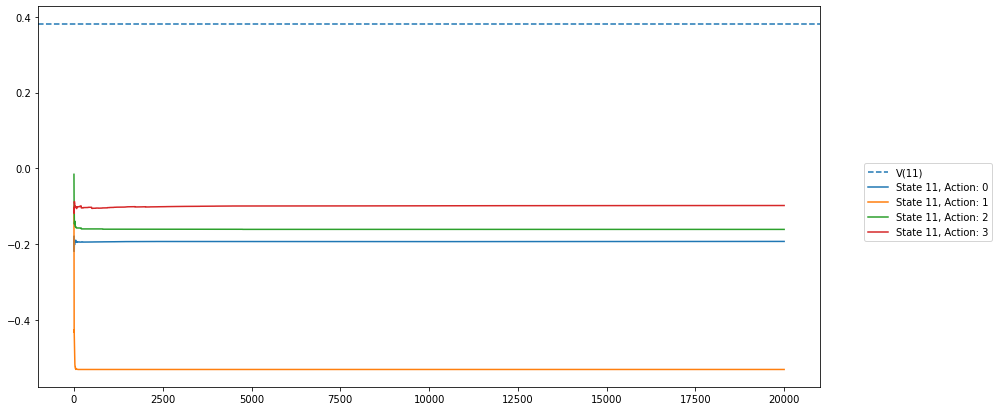

[2 2 2 0 1 0 1 0 1 2 1 3]


In [29]:
#your code goes here
state_value = np.zeros((10, noEpisodes, 12))
q_value = np.zeros((10, noEpisodes, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt3.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 20K. Learning rate if taken as (1/e+1), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes. Checked with linear decay also, exponential is giving higher performance.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. The states which are close to hole state giving -ve values for V-function. This is beacuse it is more likely to finish in hole state from those states. 

--> Theoritically, if we run this algorithm for infinite amount of time, all posiible state-action pair will be considered and it'll gradually converge to true value function. But here in 20K episodes it seems like the value function is not improving after some (~15K) initial episodes. 

--> If we give priority to those states which are visited more by using eligibility trace, it converges much faster. This is clear if we caompare this algorithm with SARSA.

--> Very similar to Q lambda with replaing trace.

## Problem 10: Dyna-Q
(40+20+20+5+5+5+5=100 points)

Implement the Dyna-Q algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 36, 37.

`Dyna-Q(env, γ, α0, ϵ0, noEpisodes, noPlanning)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [30]:
def getVisitedStatesAndActionsTaken(T):
    sdict = np.empty((0), int)
    adict = np.empty((0), int)
    for s in range(12):
        for a in range(4):
            for sprime in range(12):
                if T[s, a, sprime] > 0:
                    if s not in sdict:
                        sdict = np.append(sdict, s)
                    if a not in adict:
                        adict = np.append(adict, a)
    return sdict, adict

In [33]:
# Dyna-Q
def dyna_q(env, gamma, alpha, epsilon, noEpisodes, noPlanning):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    T = np.zeros((12, 4, 12))
    R = np.zeros((12, 4, 12))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)
        s, done = env.reset()
        while not done:
            a = actionSelect(s, q, epsilon)
            sprime, r, done, _ = env.step(a)
            T[s, a, sprime] += 1
            rDiff = r - R[s, a, sprime]
            R[s, a, sprime] += (rDiff/T[s, a, sprime])
            td_target = r  
            if not done:
                td_target += gamma*np.max(q[sprime, :])
            td_error = td_target - q[s, a]
            q[s, a] += alpha*td_error
            sbackup = sprime
            for _ in range(noPlanning):
                if np.sum(q) == 0:
                    break
                svisited, ataken = getVisitedStatesAndActionsTaken(T)
                s = np.random.choice(svisited)
                a = np.random.choice(ataken)
                if not np.sum(T[s, a, :]):continue
                prob_sprime = T[s, a, :]/np.sum(T[s, a, :]) 
                sprime = np.random.choice(12, 1, p = prob_sprime)
                r = R[s, a, sprime]
                td_target = r + gamma*np.max(q[sprime, :])
                td_error = td_target - q[s, a]
                q[s, a] += alpha*td_error
            s = sbackup
        q_value[e] = q  
    state_value = np.max(q_value, axis = 2)
    optimal_policy = np.argmax(q, axis = 1)  
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [15:30<00:00, 93.01s/it]


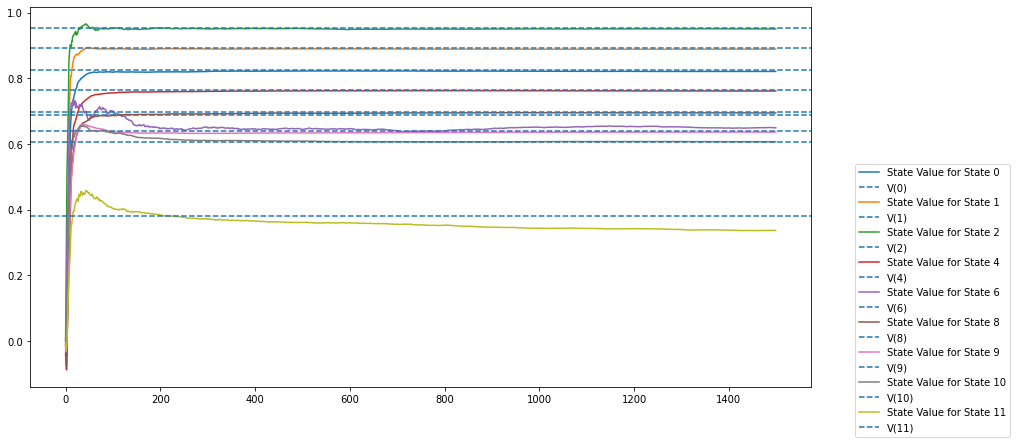

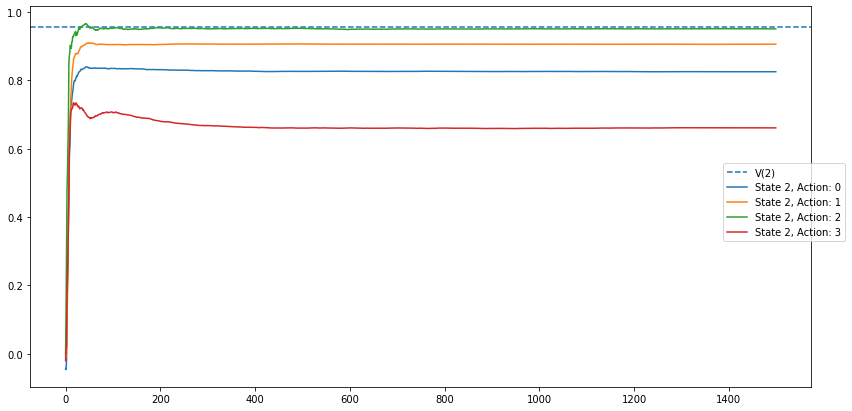

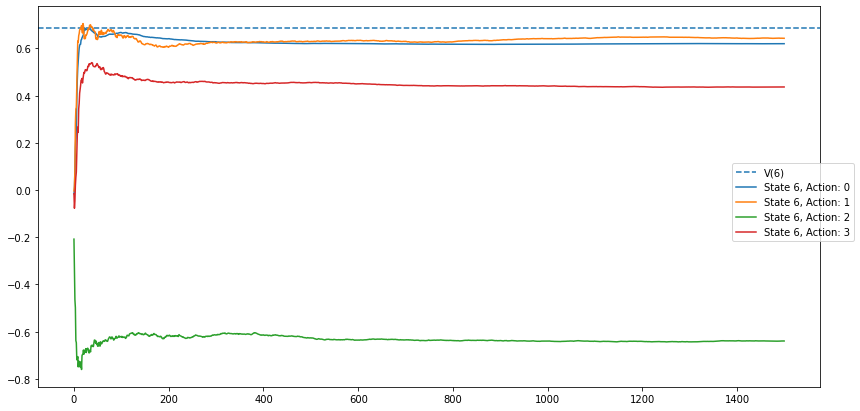

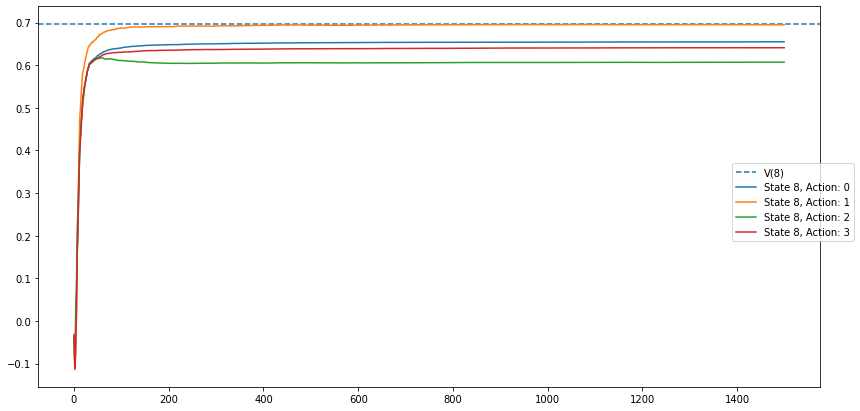

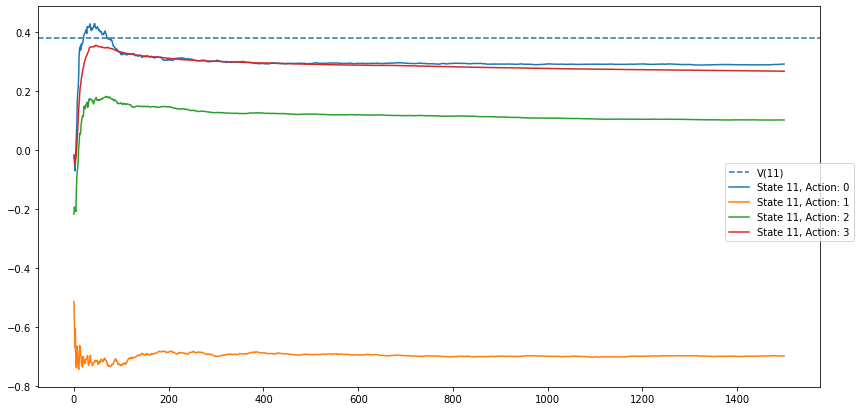

[2 2 2 0 1 0 1 0 1 0 1 0]


In [35]:
#your code goes here
state_value = np.zeros((10, noEpisodes1, 12))
q_value = np.zeros((10, noEpisodes1, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = dyna_q(env, gamma, alpha, epsilon, noEpisodes1, noPlanning = noPlanning)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt7.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 1.5K, because of computation. Learning rate if taken as (1/e+1), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. This algorithm converges with very less number of episodes, because in each episode this process do "planning" along with "learning". 

--> Because of this "planning" steps this algo is computationally heavy than other algos. This is why I have run this algorithm for 1500 episodes only.

--> The performance is much superior than every algoritm that we have seen till now.

## Problem 11: Trajectory Learning
(40+20+20+5+5+5+5=100 points)

Implement the Trajectory Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 40, 41, 42.

`TrajectorySampling(env, γ, α0, ϵ0, noEpisodes, maxTrajectory)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [37]:
# Trajectory sampling
def trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes, maxTrajectory):
    # your code goes here
    q = np.zeros((12, 4))
    q_value = np.zeros((noEpisodes, 12, 4))
    T = np.zeros((12, 4, 12))
    R = np.zeros((12, 4, 12))
    for e in range(noEpisodes):
        alpha = decayLearningRate(e)
        epsilon = decayEpsilon(epsilon, e)
        s, done = env.reset()
        while not done:
            a = actionSelect(s, q, epsilon)
            sprime, r, done, _ = env.step(a)
            T[s, a, sprime] += 1
            rDiff = r - R[s, a, sprime]
            R[s, a, sprime] += (rDiff/T[s, a, sprime])
            td_target = r  
            if not done:
                td_target += gamma*np.max(q[sprime, :])
            td_error = td_target - q[s, a]
            q[s, a] += alpha*td_error
            sbackup = sprime
            for _ in range(noPlanning):
                if np.sum(q) == 0:
                    break
                a = actionSelect(s, q, epsilon)
                if not np.sum(T[s, a, :]):continue
                prob_sprime = T[s, a, :]/np.sum(T[s, a, :]) 
                sprime = np.random.choice(12, 1, p = prob_sprime)
                r = R[s, a, sprime]
                td_target = r + gamma*np.max(q[sprime, :])
                td_error = td_target - q[s, a]
                q[s, a] += alpha*td_error
            s = sbackup
        q_value[e] = q  
    state_value = np.max(q_value, axis=2)
    optimal_policy = np.argmax(q, axis = 1)        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [01:28<00:00,  8.81s/it]


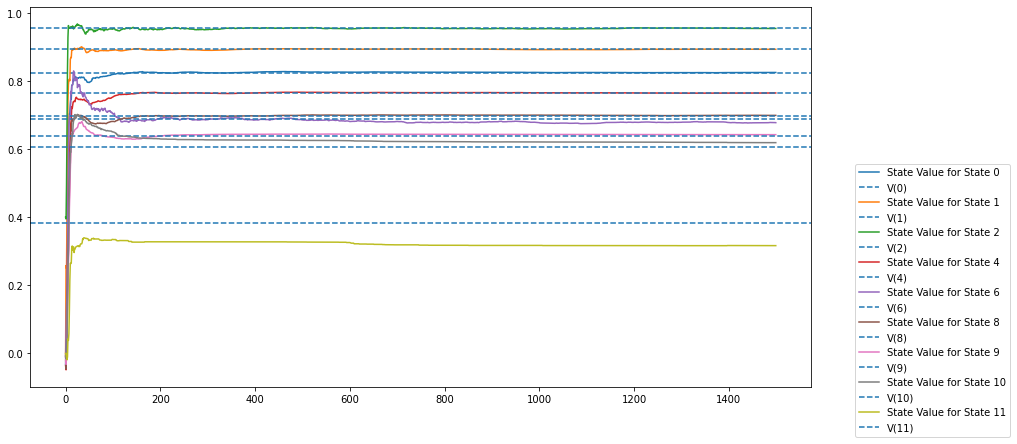

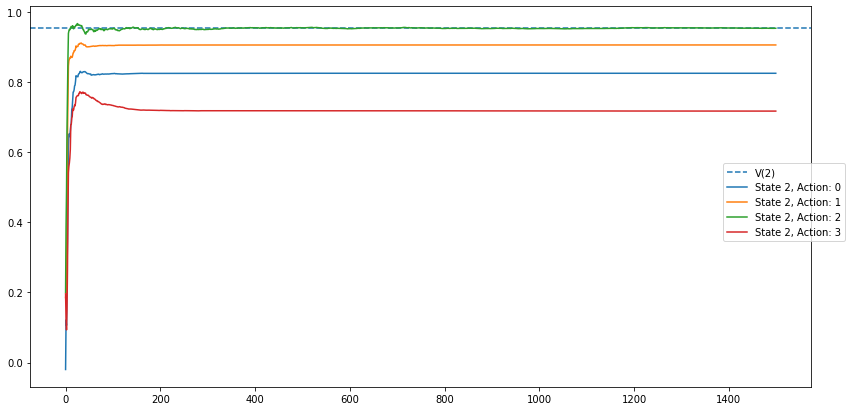

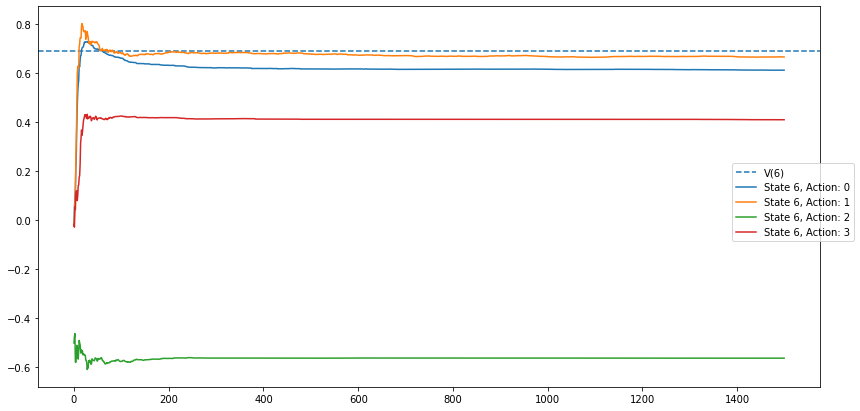

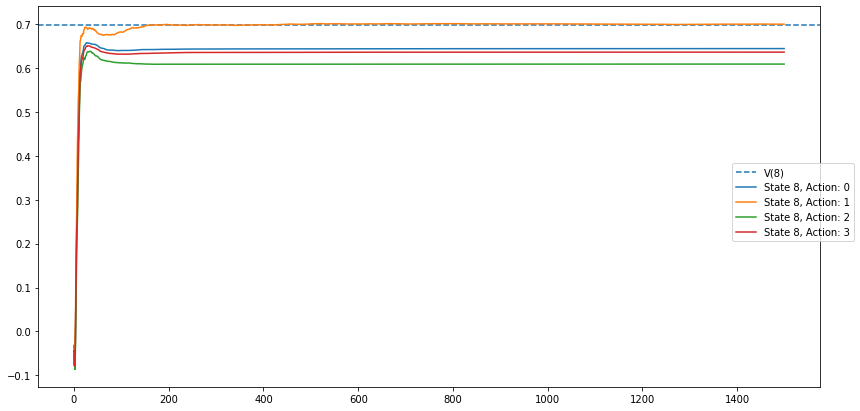

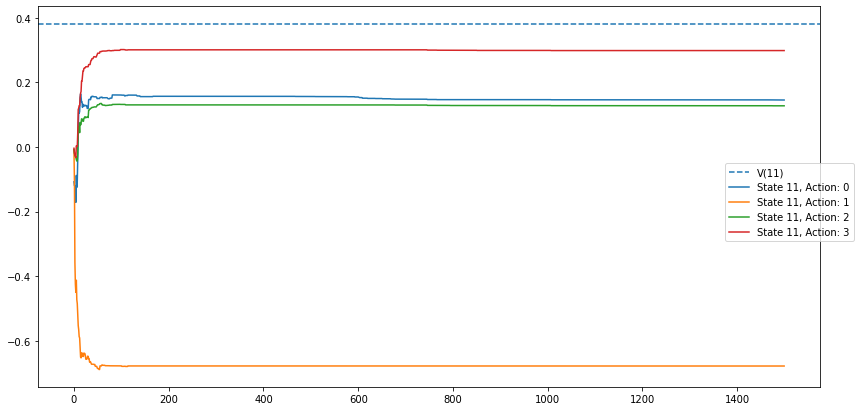

[2 2 2 0 1 0 1 0 1 0 1 0]


In [39]:
#your code goes here
state_value = np.zeros((10, noEpisodes1, 12))
q_value = np.zeros((10, noEpisodes1, 12, 4))
for i in tqdm(range(10)):
    env.reset()
    env.seed(2000+i)
    state_value[i], q_value[i], optimal_policy = trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes1, maxTrajectory)
plot(np.mean(state_value, axis = 0), np.mean(q_value, axis = 0))
print(optimal_policy)

(c) I have averaged it over 20 environment instances. The seed values are 2000, 2001, ..., 2019.

(d) <b>Optimal Policy</b> 

<img src="image/opt7.jpeg" style="height:200px"> 

(e) The hyperparameters are mentioned in the above mentioned box. I have used noEpisodes = 1.5K, because of computation. Learning rate if taken as (1/e+1), and epsilon is decaying exponentially from 1 to 0.01 in 500 episodes and becoming 0.01 for latter episodes.

(f) Observations:

--> This process depends on action taken from the current state. So, V-function converges to true value only when a lot of action is taken and every possible state-action pair is taken into picture. This algorithm converges with very less number of episodes, because in each episode this process do "planning" along with "learning". 

--> Because of this "planning" steps this algo is computationally heavy than other algos. This is why I have run this algorithm for 1500 episodes only.

--> The performance is much superior than every algoritm that we have seen till now, even better than Dyna-Q.

## Problem 12: Comparing Control Algorithms
(5+5+5+5+5+5=25 points)

For SARSA(λ) Replacing, SARSA(λ) Accumulating, Q(λ) Replacing, Q(λ) Accumulating, Dyna-Q, Trajectory Learning implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.

(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

100%|██████████| 1500/1500 [04:00<00:00,  6.24it/s]


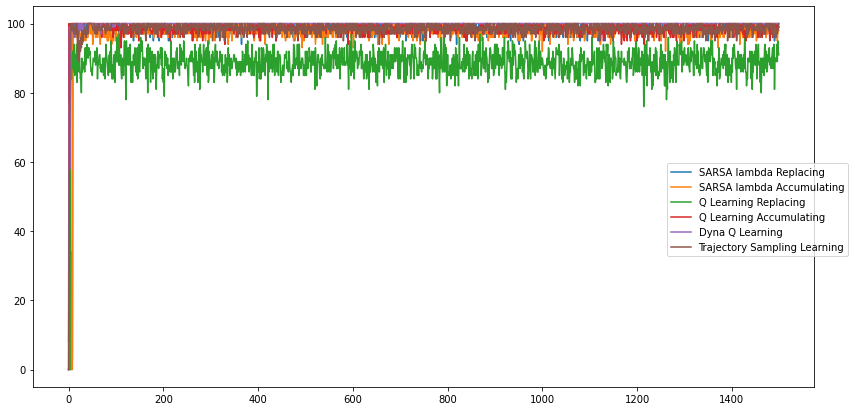

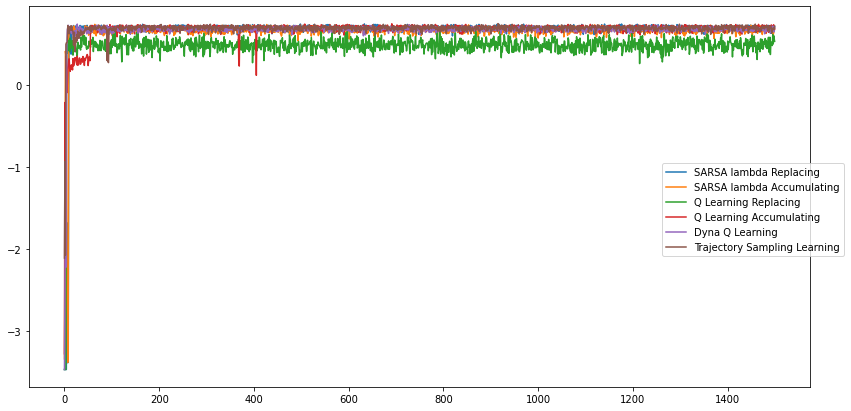

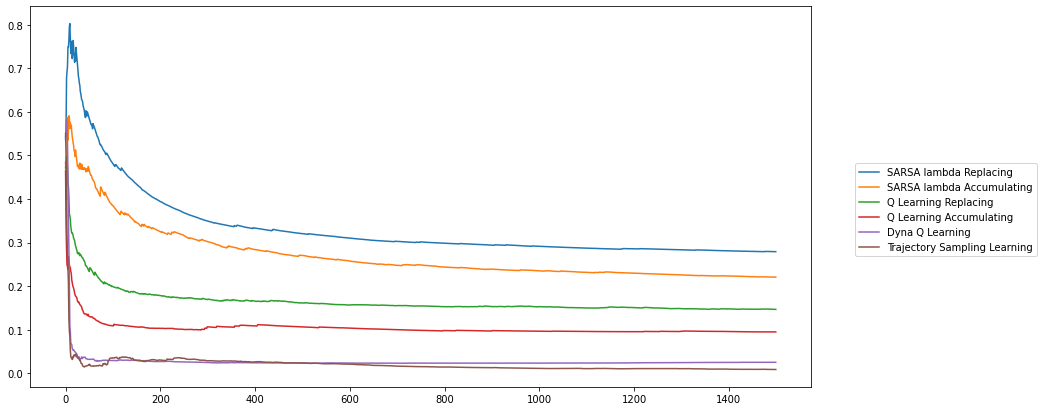

In [40]:
#your code/plots go here
#your code goes here
true_val = np.array([0.8244, 0.8929, 0.9546, 0, 0.7643, 0, 0.6882, 0, 0.6976, 0.6391, 0.6061, 0.3819])

state_slr, temp1, _ = sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes1, replaceTrace = True)
state_sla, temp2, _ = sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes1, replaceTrace = False)
state_qlr, temp3, _ = q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes1, replaceTrace = True)
state_qla, temp4, _ = q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes1, replaceTrace = False)
state_dynaq, temp5, _ = dyna_q(env, gamma, alpha, epsilon, noEpisodes1, noPlanning = noPlanning)
state_tra, temp6, _ = trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes1, maxTrajectory)

sarsa_rep = np.argmax(temp1, axis = 2)
sarsa_acc = np.argmax(temp2, axis = 2)
q_rep = np.argmax(temp3, axis = 2)
q_acc = np.argmax(temp4, axis = 2)
dyna_q_policy = np.argmax(temp5, axis = 2)
trajec_policy = np.argmax(temp6, axis = 2)

estimation_error_sarsa_rep = np.mean(np.abs(state_slr - true_val), axis = 1)
estimation_error_sarsa_acc = np.mean(np.abs(state_sla - true_val), axis = 1)
estimation_error_q_rep = np.mean(np.abs(state_qlr - true_val), axis = 1)
estimation_error_q_acc = np.mean(np.abs(state_qla - true_val), axis = 1)
estimation_error_dyna = np.mean(np.abs(state_dynaq - true_val), axis = 1)
estimation_error_trajec = np.mean(np.abs(state_tra - true_val), axis = 1)

success_rate_sarsa_rep = np.zeros(noEpisodes1)
success_rate_sarsa_acc = np.zeros(noEpisodes1)
success_rate_q_rep = np.zeros(noEpisodes1)
success_rate_q_acc = np.zeros(noEpisodes1)
success_rate_dyna_q_policy = np.zeros(noEpisodes1)
success_rate_trajec_policy = np.zeros(noEpisodes1)

exp_sla = np.zeros(noEpisodes1)
exp_slr = np.zeros(noEpisodes1)
exp_qla = np.zeros(noEpisodes1)
exp_qlr = np.zeros(noEpisodes1)
exp_dynaq = np.zeros(noEpisodes1)
exp_tra = np.zeros(noEpisodes1)

for e in tqdm(range(noEpisodes1)):
    success_rate_sarsa_rep[e], exp_slr[e]  = get_policy_success_rate(env, sarsa_rep[e, :], 3)
    success_rate_sarsa_acc[e], exp_sla[e] = get_policy_success_rate(env, sarsa_acc[e, :], 3)
    success_rate_q_rep[e], exp_qlr[e] = get_policy_success_rate(env, q_rep[e, :], 3)
    success_rate_q_acc[e], exp_qla[e] = get_policy_success_rate(env, q_acc[e, :], 3)
    success_rate_dyna_q_policy[e], exp_dynaq[e] = get_policy_success_rate(env, dyna_q_policy[e, :], 3)
    success_rate_trajec_policy[e], exp_tra[e] = get_policy_success_rate(env, trajec_policy[e, :], 3)

plt.figure(figsize=(14, 7))
plt.plot(success_rate_sarsa_rep, label = 'SARSA lambda Replacing')
plt.plot(success_rate_sarsa_acc, label = 'SARSA lambda Accumulating')
plt.plot(success_rate_q_rep, label = 'Q Learning Replacing')
plt.plot(success_rate_q_acc, label = 'Q Learning Accumulating')
plt.plot(success_rate_dyna_q_policy, label = 'Dyna Q Learning')
plt.plot(success_rate_trajec_policy, label = 'Trajectory Sampling Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(exp_slr, label = 'SARSA lambda Replacing')
plt.plot(exp_sla, label = 'SARSA lambda Accumulating')
plt.plot(exp_qlr, label = 'Q Learning Replacing')
plt.plot(exp_qla, label = 'Q Learning Accumulating')
plt.plot(exp_dynaq, label = 'Dyna Q Learning')
plt.plot(exp_tra, label = 'Trajectory Sampling Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(estimation_error_sarsa_rep, label = 'SARSA lambda Replacing')
plt.plot(estimation_error_sarsa_acc, label = 'SARSA lambda Accumulating')
plt.plot(estimation_error_q_rep, label = 'Q Learning Replacing')
plt.plot(estimation_error_q_acc, label = 'Q Learning Accumulating')
plt.plot(estimation_error_dyna, label = 'Dyna Q Learning')
plt.plot(estimation_error_trajec, label = 'Trajectory Sampling Learning')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

(b)--> Except Q-learning with replacing traces every algorithm is giving 100% success rate after some episodes. Dyna-Q and Trajactory sampling is converging very fast than others, because these two algorithm does "planning" along with "learning".

(d)--> The expected return is around 0.7 for all algoritm except Q-lerning with replacing traces. Q-learning replacing is giving poor result in terms of expected return

(f)--> The error estimation for Dyna-Q and Trajactory Sampling is very low after just some initial episodes. Qlambda performs better than SARSA lambda. For this environment accumulating traces seems to be good choice over replacing traces. 